In [12]:
import sys
# sys.path.insert(0,"..")
print(sys.path)
print("---------------------------------------------------------")
from _7utils.dataReader import DataReader
import matplotlib.pyplot as plt
dataReader = DataReader()
# dataReader.readAll(sys)
#readOfflineEEGandStageLabels2pickle.py reads text files containing EEG raw data signals and ground truth stage labels from the WAVEDIR directory. It writes files starting with "eegAndStage" into the "data/pickled" directory. These files are in Python's pickle format to enable faster access.


['d:\\OneDrive - 筑波大学\\lab\\codes\\MSlab_project\\rearrange\\code', '..', 'd:\\anaconda\\envs\\torch\\python39.zip', 'd:\\anaconda\\envs\\torch\\DLLs', 'd:\\anaconda\\envs\\torch\\lib', 'd:\\anaconda\\envs\\torch', '', 'C:\\Users\\ImpWa\\AppData\\Roaming\\Python\\Python39\\site-packages', 'd:\\anaconda\\envs\\torch\\lib\\site-packages', 'd:\\anaconda\\envs\\torch\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\torch\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\torch\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\torch\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ImpWa\\.ipython']
---------------------------------------------------------
in ParameterSetup, paramFilePath = ../data/params/params.json


In [ ]:
dc = {"a":1,"b":2,"c":3}
ls = [3,2,4,6]
ls[:2]

In [2]:
import numpy as np
data,m, t = dataReader.readEEG("../data/sampledata/Raw/D1798_short.txt")
data = np.array(data).reshape(1, -1)      
# raw = mne.io.RawArray(data, inf)      
data.shape

---------------------
Started to read ../data/sampledata/Raw/D1798_short.txt. It may take a few minutes before starting to classify. Please wait.
---------------------


(1, 99981)

## stft-freqs

### signal

In [6]:
from scipy import signal

eegSegment = data[0][:128*4]
samplingFreq = 128
stft_nperseg = 256
freqs, segment_times, Zxx = signal.stft(
    eegSegment, fs=samplingFreq, nperseg=stft_nperseg)


def filtering(Zxx, freqs, lowerFreq, upperFreq):
    zipped = list(filter(lambda x: lowerFreq <=
                         x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
    return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])


Zxx_filtered, f = filtering(Zxx, freqs, 1, 12)


BandWidth = 11
binWidth4freqHisto = 0.5

freqBinNum = round(BandWidth / binWidth4freqHisto)
binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))

Zxx_binned = np.array([np.sum(np.abs(
    Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in range(freqBinNum)])

plt.pcolormesh(segment_times, f, Zxx_binned)
# plt.pcolormesh(segment_times, f, Zxx_binned, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Bin')
plt.xlabel('Time [sec]')
plt.show()


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. ])

In [20]:
Zxx_filtered

array([[ 9.78900092e-01+1.94017226e+00j,  1.01995153e+00+3.47806437e-01j,
         6.17327282e-01+1.05652332e+00j, -2.79501426e+00-2.01574802e+00j,
        -4.09943413e+00-5.68626371e+00j],
       [-1.69464802e+00-2.12543811e+00j, -1.30084695e+00-7.71286944e-02j,
         7.48873295e-01-3.72852594e+00j,  3.14987762e+00+2.54897541e+00j,
         1.84237554e+00+5.72354273e+00j],
       [ 4.27773276e+00+5.66998855e-01j, -4.02402266e-01+5.39389137e+00j,
        -2.03508982e+00+2.91511105e+00j, -3.37458714e+00-4.03985953e+00j,
         3.21353001e-01-5.16148282e+00j],
       [-2.98457138e+00+3.21456874e+00j,  3.44917819e+00-9.27315013e+00j,
         6.41348303e-03-2.36837662e+00j,  3.97893503e+00+4.93819748e+00j,
        -1.32326973e+00+3.48793276e+00j],
       [-1.56315835e-01-2.36827163e+00j, -2.55834994e+00+7.54601604e+00j,
        -1.22715753e+00+1.59475383e+00j, -2.27110726e+00-3.61889854e+00j,
         1.17255283e+00-2.82660309e+00j],
       [-1.12148257e+00+6.43293109e-01j, -3.744571

In [24]:

BandWidth = 11
binWidth4freqHisto = 0.5


freqBinNum = round(BandWidth / binWidth4freqHisto) 
binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))

Zxx_binned = np.array([np.sum(np.abs(
    Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in range(freqBinNum)])
Zxx_binned


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_16160\3354741108.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))


array([[15.9665055 , 25.65138374, 12.96248297, 23.37622268, 24.98482513],
       [17.19515899, 23.00152185, 19.67170368,  7.8107057 , 13.39578317],
       [19.31483092, 17.90243505, 21.29440439, 30.85329207,  7.09114289],
       [14.81657008, 19.24369628, 18.66620109, 21.5468542 , 12.52238302],
       [ 4.41718462,  7.28207574,  4.70247831,  5.33884032,  2.32198397],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0. 

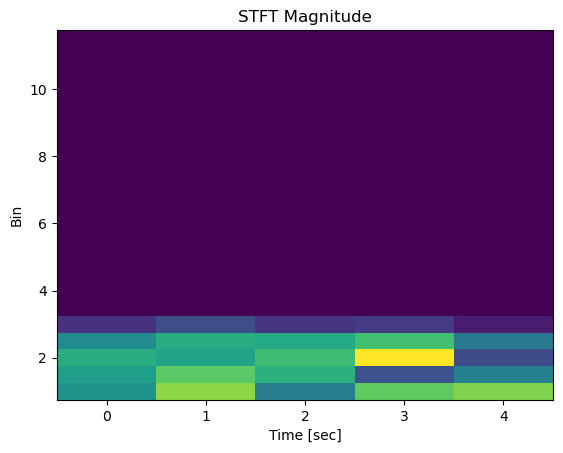

In [25]:
plt.pcolormesh(segment_times, f, Zxx_binned)
# plt.pcolormesh(segment_times, f, Zxx_binned, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Bin')
plt.xlabel('Time [sec]')
plt.show()


### mne

In [ ]:
import mne

eegSegment = data[0][:128*4]
sfreq = 128
nperseg = 256

# Create MNE RawArray object from EEG data
raw = mne.io.RawArray(eegSegment.reshape(1, -1), info=mne.create_info(['EEG'], sfreq, 'eeg'))
raw.compute_psd(fmin =1,fmax =12).get_data()#.plot()
# raw

In [ ]:
import mne

eegSegment = data[0][:128*4]
sfreq = 128
nperseg = 256

# Create MNE RawArray object from EEG data
# raw = mne.io.RawArray(eegSegment.reshape(1, -1), info=mne.create_info(ch_names=['EEG'], sfreq=sfreq))
seg = eegSegment.reshape((1,-1))
seg.shape
# Apply STFT
frequencies = mne.time_frequency.stft(seg, wsize=nperseg)
fr = frequencies[0]
f = np.sum(abs(fr),axis = 1)
plt.plot(f)

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(segment_times, freqs, np.abs(Zxx),  # shading='gouraud'
               )
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.ylim(fmin, fmax)
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                      x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

def binning(Zxx, freqs, freqBinNum):
    binSize = np.int(np.floor(1.0 * len(Zxx) / freqBinNum))
    Zxx_binned = np.array([np.sum(np.abs(Zxx[(binID*binSize):((binID+1)*binSize)]),axis=0) for binID in range(freqBinNum)])
    freqs_binned = np.array([np.mean(freqs[(binID*binSize):((binID+1)*binSize)],axis=0) for binID in range(freqBinNum)])
    return Zxx_binned, freqs_binned

In [4]:
a = [i for i in range(5)]
print(a[:3])

[0, 1, 2]
